In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)
print("cfg_env",cfg_env)

seed 1
cfg_env cartpole


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(-7875.4570)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 29612.53251  validloss 28798.53076±0.00000  bestvalidloss 28798.53076  last_update 0
train: iter 1  trainloss 2909.69971  validloss 1664.17123±0.00000  bestvalidloss 1664.17123  last_update 0
train: iter 2  trainloss 2927.73078  validloss 1332.37642±0.00000  bestvalidloss 1332.37642  last_update 0
train: iter 3  trainloss 1910.93044  validloss 1176.35914±0.00000  bestvalidloss 1176.35914  last_update 0
train: iter 4  trainloss 1378.65405  validloss 1112.51168±0.00000  bestvalidloss 1112.51168  last_update 0
train: iter 5  trainloss 1193.93200  validloss 1044.42471±0.00000  bestvalidloss 1044.42471  last_update 0
train: iter 6  trainloss 1190.70031  validloss 1030.92500±0.00000  bestvalidloss 1030.92500  last_update 0
train: iter 7  trainloss 1087.34951  validloss 1447.92330±0.00000  bestvalidloss 1030.92500  last_update 1
train: iter 8  trainloss 1034.80688  validloss 1001.82381±0.00000  bestvalidloss 1001.82381  last_update 0
train: iter 9  

train: iter 77  trainloss -472.36623  validloss -457.78166±0.00000  bestvalidloss -457.78166  last_update 0
train: iter 78  trainloss -482.06876  validloss -438.77308±0.00000  bestvalidloss -457.78166  last_update 1
train: iter 79  trainloss -453.05872  validloss -467.47838±0.00000  bestvalidloss -467.47838  last_update 0
train: iter 80  trainloss -476.10761  validloss -494.51518±0.00000  bestvalidloss -494.51518  last_update 0
train: iter 81  trainloss -379.47435  validloss -452.64368±0.00000  bestvalidloss -494.51518  last_update 1
train: iter 82  trainloss -486.23303  validloss -469.56813±0.00000  bestvalidloss -494.51518  last_update 2
train: iter 83  trainloss -486.44701  validloss -445.30703±0.00000  bestvalidloss -494.51518  last_update 3
train: iter 84  trainloss -363.22563  validloss -458.79488±0.00000  bestvalidloss -494.51518  last_update 4
train: iter 85  trainloss -463.59056  validloss -421.98044±0.00000  bestvalidloss -494.51518  last_update 5
train: iter 86  trainloss -5

train: iter 153  trainloss -750.41219  validloss -730.12974±0.00000  bestvalidloss -768.19763  last_update 8
train: iter 154  trainloss -757.72260  validloss -720.44904±0.00000  bestvalidloss -768.19763  last_update 9
train: iter 155  trainloss -777.19634  validloss -705.10197±0.00000  bestvalidloss -768.19763  last_update 10
train: iter 156  trainloss -658.88071  validloss -771.04091±0.00000  bestvalidloss -771.04091  last_update 0
train: iter 157  trainloss -382.49500  validloss -665.68423±0.00000  bestvalidloss -771.04091  last_update 1
train: iter 158  trainloss -700.75221  validloss -618.72111±0.00000  bestvalidloss -771.04091  last_update 2
train: iter 159  trainloss -770.32962  validloss -718.83034±0.00000  bestvalidloss -771.04091  last_update 3
train: iter 160  trainloss -814.30756  validloss -767.54101±0.00000  bestvalidloss -771.04091  last_update 4
train: iter 161  trainloss -773.94768  validloss -791.96920±0.00000  bestvalidloss -791.96920  last_update 0
train: iter 162  t

train: iter 229  trainloss -918.95156  validloss -956.40245±0.00000  bestvalidloss -961.03818  last_update 4
train: iter 230  trainloss -943.89020  validloss -856.20793±0.00000  bestvalidloss -961.03818  last_update 5
train: iter 231  trainloss -714.89225  validloss -871.42762±0.00000  bestvalidloss -961.03818  last_update 6
train: iter 232  trainloss -924.01205  validloss -790.82453±0.00000  bestvalidloss -961.03818  last_update 7
train: iter 233  trainloss -676.80693  validloss -875.36682±0.00000  bestvalidloss -961.03818  last_update 8
train: iter 234  trainloss -944.16061  validloss -931.23321±0.00000  bestvalidloss -961.03818  last_update 9
train: iter 235  trainloss -733.99331  validloss -975.51769±0.00000  bestvalidloss -975.51769  last_update 0
train: iter 236  trainloss -787.26576  validloss -820.55262±0.00000  bestvalidloss -975.51769  last_update 1
train: iter 237  trainloss -914.41405  validloss -835.93501±0.00000  bestvalidloss -975.51769  last_update 2
train: iter 238  tr

train: iter 304  trainloss -1013.48892  validloss -1040.29074±0.00000  bestvalidloss -1078.44843  last_update 3
train: iter 305  trainloss -971.43967  validloss -955.22302±0.00000  bestvalidloss -1078.44843  last_update 4
train: iter 306  trainloss -1032.06755  validloss -900.51608±0.00000  bestvalidloss -1078.44843  last_update 5
train: iter 307  trainloss -995.22978  validloss -989.16158±0.00000  bestvalidloss -1078.44843  last_update 6
train: iter 308  trainloss -800.02687  validloss -959.86877±0.00000  bestvalidloss -1078.44843  last_update 7
train: iter 309  trainloss -1016.81086  validloss -1013.89419±0.00000  bestvalidloss -1078.44843  last_update 8
train: iter 310  trainloss -948.19165  validloss -1047.07850±0.00000  bestvalidloss -1078.44843  last_update 9
train: iter 311  trainloss -1025.79596  validloss -962.24689±0.00000  bestvalidloss -1078.44843  last_update 10
train: iter 312  trainloss -867.46750  validloss -1028.68038±0.00000  bestvalidloss -1078.44843  last_update 11


train: iter 378  trainloss -974.36434  validloss -1017.73223±0.00000  bestvalidloss -1121.47502  last_update 11
train: iter 379  trainloss -1024.51949  validloss -1044.67881±0.00000  bestvalidloss -1121.47502  last_update 12
train: iter 380  trainloss -989.66121  validloss -1018.71917±0.00000  bestvalidloss -1121.47502  last_update 13
train: iter 381  trainloss -1092.69918  validloss -1011.69547±0.00000  bestvalidloss -1121.47502  last_update 14
train: iter 382  trainloss -993.95153  validloss -913.69109±0.00000  bestvalidloss -1121.47502  last_update 15
train: iter 383  trainloss -915.35988  validloss -1037.44771±0.00000  bestvalidloss -1121.47502  last_update 16
train: iter 384  trainloss -902.43690  validloss -960.20908±0.00000  bestvalidloss -1121.47502  last_update 17
train: iter 385  trainloss -943.08151  validloss -625.38706±0.00000  bestvalidloss -1121.47502  last_update 18
train: iter 386  trainloss -1114.78286  validloss -1068.09966±0.00000  bestvalidloss -1121.47502  last_up

train: iter 452  trainloss -950.55691  validloss -1067.94958±0.00000  bestvalidloss -1224.58160  last_update 11
train: iter 453  trainloss -1142.18727  validloss -1086.34310±0.00000  bestvalidloss -1224.58160  last_update 12
train: iter 454  trainloss -1195.18797  validloss -1168.63215±0.00000  bestvalidloss -1224.58160  last_update 13
train: iter 455  trainloss -1036.10337  validloss -1173.07448±0.00000  bestvalidloss -1224.58160  last_update 14
train: iter 456  trainloss -1208.13272  validloss -1151.79463±0.00000  bestvalidloss -1224.58160  last_update 15
train: iter 457  trainloss -1116.07241  validloss -1212.02313±0.00000  bestvalidloss -1224.58160  last_update 16
train: iter 458  trainloss -1108.46642  validloss -1119.98064±0.00000  bestvalidloss -1224.58160  last_update 17
train: iter 459  trainloss -1218.34348  validloss -1173.92742±0.00000  bestvalidloss -1224.58160  last_update 18
train: iter 460  trainloss -1013.27795  validloss -921.33567±0.00000  bestvalidloss -1224.58160  

train: iter 525  trainloss -1301.26437  validloss -1292.06106±0.00000  bestvalidloss -1303.13265  last_update 11
train: iter 526  trainloss -1301.52552  validloss -1305.33428±0.00000  bestvalidloss -1305.33428  last_update 0
train: iter 527  trainloss -837.27979  validloss -1186.49875±0.00000  bestvalidloss -1305.33428  last_update 1
train: iter 528  trainloss -1210.58864  validloss -1080.65771±0.00000  bestvalidloss -1305.33428  last_update 2
train: iter 529  trainloss -1251.08563  validloss -1302.28101±0.00000  bestvalidloss -1305.33428  last_update 3
train: iter 530  trainloss -1244.41993  validloss -1263.07276±0.00000  bestvalidloss -1305.33428  last_update 4
train: iter 531  trainloss -1183.98720  validloss -799.25434±0.00000  bestvalidloss -1305.33428  last_update 5
train: iter 532  trainloss -1195.61209  validloss -1075.73722±0.00000  bestvalidloss -1305.33428  last_update 6
train: iter 533  trainloss -1248.20767  validloss -1171.87796±0.00000  bestvalidloss -1305.33428  last_up

train: iter 598  trainloss -1223.98154  validloss -1296.67808±0.00000  bestvalidloss -1363.91973  last_update 22
train: iter 599  trainloss -1328.01032  validloss -1191.62370±0.00000  bestvalidloss -1363.91973  last_update 23
train: iter 600  trainloss -1129.24716  validloss -736.99544±0.00000  bestvalidloss -1363.91973  last_update 24
train: iter 601  trainloss -1243.92633  validloss -1306.94865±0.00000  bestvalidloss -1363.91973  last_update 25
train: iter 602  trainloss -1337.55273  validloss -1259.52564±0.00000  bestvalidloss -1363.91973  last_update 26
train: iter 603  trainloss -1190.39880  validloss -1371.95710±0.00000  bestvalidloss -1371.95710  last_update 0
train: iter 604  trainloss -1274.46194  validloss -1304.20790±0.00000  bestvalidloss -1371.95710  last_update 1
train: iter 605  trainloss -1211.52413  validloss -1215.40157±0.00000  bestvalidloss -1371.95710  last_update 2
train: iter 606  trainloss -1355.44109  validloss -1321.24082±0.00000  bestvalidloss -1371.95710  la

train: iter 671  trainloss -1341.86378  validloss -1365.60113±0.00000  bestvalidloss -1391.53401  last_update 12
train: iter 672  trainloss -1324.43903  validloss -1224.56446±0.00000  bestvalidloss -1391.53401  last_update 13
train: iter 673  trainloss -1318.87863  validloss -1376.66312±0.00000  bestvalidloss -1391.53401  last_update 14
train: iter 674  trainloss -1270.69890  validloss -999.18773±0.00000  bestvalidloss -1391.53401  last_update 15
train: iter 675  trainloss -1385.71217  validloss -1363.72581±0.00000  bestvalidloss -1391.53401  last_update 16
train: iter 676  trainloss -1250.06202  validloss -1214.45684±0.00000  bestvalidloss -1391.53401  last_update 17
train: iter 677  trainloss -1139.81387  validloss -1379.31643±0.00000  bestvalidloss -1391.53401  last_update 18
train: iter 678  trainloss -1175.81494  validloss -1176.94470±0.00000  bestvalidloss -1391.53401  last_update 19
train: iter 679  trainloss -1352.55191  validloss -1326.43863±0.00000  bestvalidloss -1391.53401 

train: iter 744  trainloss -1370.22078  validloss -1253.11355±0.00000  bestvalidloss -1427.39432  last_update 10
train: iter 745  trainloss -1298.81912  validloss -1331.21808±0.00000  bestvalidloss -1427.39432  last_update 11
train: iter 746  trainloss -1257.00135  validloss -1346.90706±0.00000  bestvalidloss -1427.39432  last_update 12
train: iter 747  trainloss -1374.98850  validloss -1392.34444±0.00000  bestvalidloss -1427.39432  last_update 13
train: iter 748  trainloss -1420.18762  validloss -1373.96081±0.00000  bestvalidloss -1427.39432  last_update 14
train: iter 749  trainloss -1445.85021  validloss -1354.13713±0.00000  bestvalidloss -1427.39432  last_update 15
train: iter 750  trainloss -991.13560  validloss -1386.56453±0.00000  bestvalidloss -1427.39432  last_update 16
train: iter 751  trainloss -1016.65091  validloss -1255.71899±0.00000  bestvalidloss -1427.39432  last_update 17
train: iter 752  trainloss -1234.64327  validloss -1005.22044±0.00000  bestvalidloss -1427.39432 

train: iter 817  trainloss -1296.60805  validloss -1327.78615±0.00000  bestvalidloss -1434.61725  last_update 25
train: iter 818  trainloss -1335.33315  validloss -1332.35091±0.00000  bestvalidloss -1434.61725  last_update 26
train: iter 819  trainloss -1446.18660  validloss -1382.22217±0.00000  bestvalidloss -1434.61725  last_update 27
train: iter 820  trainloss -1369.50611  validloss -1405.20157±0.00000  bestvalidloss -1434.61725  last_update 28
train: iter 821  trainloss -1416.25920  validloss -1404.75802±0.00000  bestvalidloss -1434.61725  last_update 29
train: iter 822  trainloss -1434.15949  validloss -1389.20360±0.00000  bestvalidloss -1434.61725  last_update 30
train: iter 823  trainloss -1326.28155  validloss -1379.99005±0.00000  bestvalidloss -1434.61725  last_update 31
train: iter 824  trainloss -1255.98635  validloss -1240.86900±0.00000  bestvalidloss -1434.61725  last_update 32
train: iter 825  trainloss -1430.10381  validloss -1385.34823±0.00000  bestvalidloss -1434.61725

train: iter 890  trainloss -1461.74688  validloss -1400.32085±0.00000  bestvalidloss -1463.05570  last_update 11
train: iter 891  trainloss -1451.38043  validloss -1413.87721±0.00000  bestvalidloss -1463.05570  last_update 12
train: iter 892  trainloss -1358.42515  validloss -1430.97391±0.00000  bestvalidloss -1463.05570  last_update 13
train: iter 893  trainloss -1402.56114  validloss -1409.28995±0.00000  bestvalidloss -1463.05570  last_update 14
train: iter 894  trainloss -1320.81043  validloss -1326.36862±0.00000  bestvalidloss -1463.05570  last_update 15
train: iter 895  trainloss -1391.31749  validloss -1374.51704±0.00000  bestvalidloss -1463.05570  last_update 16
train: iter 896  trainloss -1404.77103  validloss -1421.65290±0.00000  bestvalidloss -1463.05570  last_update 17
train: iter 897  trainloss -1413.31329  validloss -1352.78415±0.00000  bestvalidloss -1463.05570  last_update 18
train: iter 898  trainloss -1433.82708  validloss -1386.37175±0.00000  bestvalidloss -1463.05570

train: iter 963  trainloss -1163.51432  validloss -1123.35218±0.00000  bestvalidloss -1463.05570  last_update 84
train: iter 964  trainloss -1316.44640  validloss -1300.08059±0.00000  bestvalidloss -1463.05570  last_update 85
train: iter 965  trainloss -1376.90992  validloss -1361.36039±0.00000  bestvalidloss -1463.05570  last_update 86
train: iter 966  trainloss -1390.19564  validloss -1378.87980±0.00000  bestvalidloss -1463.05570  last_update 87
train: iter 967  trainloss -1419.35831  validloss -1394.26102±0.00000  bestvalidloss -1463.05570  last_update 88
train: iter 968  trainloss -1389.43444  validloss -1407.30311±0.00000  bestvalidloss -1463.05570  last_update 89
train: iter 969  trainloss -1420.63966  validloss -1422.30797±0.00000  bestvalidloss -1463.05570  last_update 90
train: iter 970  trainloss -1388.84224  validloss -1344.39544±0.00000  bestvalidloss -1463.05570  last_update 91
train: iter 971  trainloss -1448.38583  validloss -1441.89336±0.00000  bestvalidloss -1463.05570

train: iter 1036  trainloss -1431.55649  validloss -1358.99490±0.00000  bestvalidloss -1480.36628  last_update 21
train: iter 1037  trainloss -1459.31346  validloss -1445.91869±0.00000  bestvalidloss -1480.36628  last_update 22
train: iter 1038  trainloss -1452.65532  validloss -1422.10975±0.00000  bestvalidloss -1480.36628  last_update 23
train: iter 1039  trainloss -1465.47474  validloss -1416.49558±0.00000  bestvalidloss -1480.36628  last_update 24
train: iter 1040  trainloss -1405.37777  validloss -1427.57917±0.00000  bestvalidloss -1480.36628  last_update 25
train: iter 1041  trainloss -1348.36758  validloss -1377.77444±0.00000  bestvalidloss -1480.36628  last_update 26
train: iter 1042  trainloss -1406.09902  validloss -1394.45734±0.00000  bestvalidloss -1480.36628  last_update 27
train: iter 1043  trainloss -1496.37560  validloss -1446.97574±0.00000  bestvalidloss -1480.36628  last_update 28
train: iter 1044  trainloss -1430.74507  validloss -1494.84219±0.00000  bestvalidloss -1

train: iter 1109  trainloss -1270.71973  validloss -1378.75458±0.00000  bestvalidloss -1494.84219  last_update 65
train: iter 1110  trainloss -1439.50060  validloss -1337.74445±0.00000  bestvalidloss -1494.84219  last_update 66
train: iter 1111  trainloss -1496.17325  validloss -1470.55782±0.00000  bestvalidloss -1494.84219  last_update 67
train: iter 1112  trainloss -1412.62549  validloss -1450.94808±0.00000  bestvalidloss -1494.84219  last_update 68
train: iter 1113  trainloss -1426.77356  validloss -1429.78749±0.00000  bestvalidloss -1494.84219  last_update 69
train: iter 1114  trainloss -1369.77044  validloss -1335.78666±0.00000  bestvalidloss -1494.84219  last_update 70
train: iter 1115  trainloss -1494.17005  validloss -1449.55115±0.00000  bestvalidloss -1494.84219  last_update 71
train: iter 1116  trainloss -1500.34129  validloss -1479.85433±0.00000  bestvalidloss -1494.84219  last_update 72
train: iter 1117  trainloss -1505.02720  validloss -1473.55305±0.00000  bestvalidloss -1

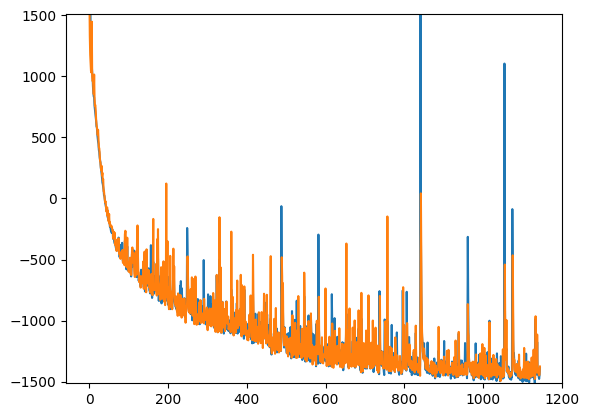

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([min(min(train_curve1),min(valid_curve1) ), 
          max(max(train_curve1[50:]),max(valid_curve1[50:])) ])
# plt.xlim([50, len(train_curve1)])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 3.83015  validloss 3.98944±0.00000  bestvalidloss 3.98944  last_update 0
train: iter 1  trainloss 3.55689  validloss 3.68759±0.00000  bestvalidloss 3.68759  last_update 0
train: iter 2  trainloss 3.32648  validloss 3.43913±0.00000  bestvalidloss 3.43913  last_update 0
train: iter 3  trainloss 3.14100  validloss 3.22841±0.00000  bestvalidloss 3.22841  last_update 0
train: iter 4  trainloss 2.98132  validloss 3.06349±0.00000  bestvalidloss 3.06349  last_update 0
train: iter 5  trainloss 2.84368  validloss 2.92065±0.00000  bestvalidloss 2.92065  last_update 0
train: iter 6  trainloss 2.72465  validloss 2.77460±0.00000  bestvalidloss 2.77460  last_update 0
train: iter 7  trainloss 2.61786  validloss 2.67123±0.00000  bestvalidloss 2.67123  last_update 0
train: iter 8  trainloss 2.51329  validloss 2.56740±0.00000  bestvalidloss 2.56740  last_update 0
train: iter 9  trainloss 2.42774  validloss 2.47382±0.00000  bestvalidloss 2.47382  last_update 0
train: iter 10  trai

train: iter 86  trainloss -0.93829  validloss -1.07374±0.00000  bestvalidloss -1.07374  last_update 0
train: iter 87  trainloss -0.91000  validloss -1.07028±0.00000  bestvalidloss -1.07374  last_update 1
train: iter 88  trainloss -0.89580  validloss -1.06309±0.00000  bestvalidloss -1.07374  last_update 2
train: iter 89  trainloss -0.96010  validloss -1.11791±0.00000  bestvalidloss -1.11791  last_update 0
train: iter 90  trainloss -0.94697  validloss -1.10998±0.00000  bestvalidloss -1.11791  last_update 1
train: iter 91  trainloss -0.97223  validloss -1.12983±0.00000  bestvalidloss -1.12983  last_update 0
train: iter 92  trainloss -0.90325  validloss -1.12557±0.00000  bestvalidloss -1.12983  last_update 1
train: iter 93  trainloss -0.90766  validloss -1.17108±0.00000  bestvalidloss -1.17108  last_update 0
train: iter 94  trainloss -0.96754  validloss -1.17069±0.00000  bestvalidloss -1.17108  last_update 1
train: iter 95  trainloss -1.01197  validloss -1.15332±0.00000  bestvalidloss -1.1

train: iter 172  trainloss -1.07534  validloss -1.31960±0.00000  bestvalidloss -1.40832  last_update 15
train: iter 173  trainloss -0.96440  validloss -1.40709±0.00000  bestvalidloss -1.40832  last_update 16
train: iter 174  trainloss -0.93723  validloss -1.37469±0.00000  bestvalidloss -1.40832  last_update 17
train: iter 175  trainloss -1.02775  validloss -1.41968±0.00000  bestvalidloss -1.41968  last_update 0
train: iter 176  trainloss -1.03065  validloss -1.31080±0.00000  bestvalidloss -1.41968  last_update 1
train: iter 177  trainloss -1.10023  validloss -1.39121±0.00000  bestvalidloss -1.41968  last_update 2
train: iter 178  trainloss -1.05674  validloss -1.40357±0.00000  bestvalidloss -1.41968  last_update 3
train: iter 179  trainloss -1.06221  validloss -1.39632±0.00000  bestvalidloss -1.41968  last_update 4
train: iter 180  trainloss -0.92650  validloss -1.31936±0.00000  bestvalidloss -1.41968  last_update 5
train: iter 181  trainloss -0.97939  validloss -1.37225±0.00000  bestv

train: iter 256  trainloss -0.94677  validloss -1.45197±0.00000  bestvalidloss -1.45197  last_update 0
train: iter 257  trainloss -1.04971  validloss -1.39576±0.00000  bestvalidloss -1.45197  last_update 1
train: iter 258  trainloss -1.03017  validloss -1.35042±0.00000  bestvalidloss -1.45197  last_update 2
train: iter 259  trainloss -1.03696  validloss -1.32932±0.00000  bestvalidloss -1.45197  last_update 3
train: iter 260  trainloss -1.03013  validloss -1.41039±0.00000  bestvalidloss -1.45197  last_update 4
train: iter 261  trainloss -0.99238  validloss -1.35751±0.00000  bestvalidloss -1.45197  last_update 5
train: iter 262  trainloss -0.99976  validloss -1.37394±0.00000  bestvalidloss -1.45197  last_update 6
train: iter 263  trainloss -1.00200  validloss -1.38563±0.00000  bestvalidloss -1.45197  last_update 7
train: iter 264  trainloss -1.00653  validloss -1.39355±0.00000  bestvalidloss -1.45197  last_update 8
train: iter 265  trainloss -1.07504  validloss -1.37463±0.00000  bestvali

train: iter 340  trainloss -0.99297  validloss -1.38079±0.00000  bestvalidloss -1.46819  last_update 1
train: iter 341  trainloss -1.01127  validloss -1.41972±0.00000  bestvalidloss -1.46819  last_update 2
train: iter 342  trainloss -1.06582  validloss -1.40930±0.00000  bestvalidloss -1.46819  last_update 3
train: iter 343  trainloss -1.00554  validloss -1.44265±0.00000  bestvalidloss -1.46819  last_update 4
train: iter 344  trainloss -1.03576  validloss -1.39163±0.00000  bestvalidloss -1.46819  last_update 5
train: iter 345  trainloss -1.09996  validloss -1.31801±0.00000  bestvalidloss -1.46819  last_update 6
train: iter 346  trainloss -0.97828  validloss -1.42129±0.00000  bestvalidloss -1.46819  last_update 7
train: iter 347  trainloss -1.00292  validloss -1.43589±0.00000  bestvalidloss -1.46819  last_update 8
train: iter 348  trainloss -1.02157  validloss -1.34448±0.00000  bestvalidloss -1.46819  last_update 9
train: iter 349  trainloss -0.96544  validloss -1.36544±0.00000  bestvali

train: iter 424  trainloss -1.02282  validloss -1.43497±0.00000  bestvalidloss -1.46819  last_update 85
train: iter 425  trainloss -0.99348  validloss -1.39167±0.00000  bestvalidloss -1.46819  last_update 86
train: iter 426  trainloss -0.93029  validloss -1.40268±0.00000  bestvalidloss -1.46819  last_update 87
train: iter 427  trainloss -1.09772  validloss -1.40525±0.00000  bestvalidloss -1.46819  last_update 88
train: iter 428  trainloss -0.99360  validloss -1.36749±0.00000  bestvalidloss -1.46819  last_update 89
train: iter 429  trainloss -0.98057  validloss -1.36370±0.00000  bestvalidloss -1.46819  last_update 90
train: iter 430  trainloss -1.05126  validloss -1.40140±0.00000  bestvalidloss -1.46819  last_update 91
train: iter 431  trainloss -1.04946  validloss -1.37581±0.00000  bestvalidloss -1.46819  last_update 92
train: iter 432  trainloss -1.03672  validloss -1.36749±0.00000  bestvalidloss -1.46819  last_update 93
train: iter 433  trainloss -1.03570  validloss -1.37746±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([ 2.0526, -0.0515, -5.2343, -2.5054], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 58.33872  validloss 62.89735±0.00000  bestvalidloss 62.89735  last_update 0
train: iter 1  trainloss 43.67336  validloss 49.60050±0.00000  bestvalidloss 49.60050  last_update 0
train: iter 2  trainloss 31.47649  validloss 35.61171±0.00000  bestvalidloss 35.61171  last_update 0
train: iter 3  trainloss 23.45629  validloss 25.76270±0.00000  bestvalidloss 25.76270  last_update 0
train: iter 4  trainloss 18.37481  validloss 19.76637±0.00000  bestvalidloss 19.76637  last_update 0
train: iter 5  trainloss 14.95266  validloss 15.82541±0.00000  bestvalidloss 15.82541  last_update 0
train: iter 6  trainloss 12.71885  validloss 13.38539±0.00000  bestvalidloss 13.38539  last_update 0
train: iter 7  trainloss 11.10360  validloss 11.55510±0.00000  bestvalidloss 11.55510  last_update 0
train: iter 8  trainloss 9.96175  validloss 10.17691±0.00000  bestvalidloss 10.17691  last_update 0
train: iter 9  trainloss 9.27065  validloss 9.39070±0.00000  bestvalidloss 9.39070  last_upd

train: iter 83  trainloss 3.51048  validloss 4.25021±0.00000  bestvalidloss 4.19230  last_update 20
train: iter 84  trainloss 3.52120  validloss 4.49622±0.00000  bestvalidloss 4.19230  last_update 21
train: iter 85  trainloss 3.50211  validloss 4.24828±0.00000  bestvalidloss 4.19230  last_update 22
train: iter 86  trainloss 3.48238  validloss 4.19868±0.00000  bestvalidloss 4.19230  last_update 23
train: iter 87  trainloss 3.50836  validloss 4.39912±0.00000  bestvalidloss 4.19230  last_update 24
train: iter 88  trainloss 3.49109  validloss 4.31306±0.00000  bestvalidloss 4.19230  last_update 25
train: iter 89  trainloss 3.48115  validloss 4.43975±0.00000  bestvalidloss 4.19230  last_update 26
train: iter 90  trainloss 3.48787  validloss 4.23992±0.00000  bestvalidloss 4.19230  last_update 27
train: iter 91  trainloss 3.53080  validloss 4.30738±0.00000  bestvalidloss 4.19230  last_update 28
train: iter 92  trainloss 3.50423  validloss 4.34321±0.00000  bestvalidloss 4.19230  last_update 29


train: iter 167  trainloss 3.43347  validloss 4.16263±0.00000  bestvalidloss 4.15613  last_update 25
train: iter 168  trainloss 3.40114  validloss 4.22458±0.00000  bestvalidloss 4.15613  last_update 26
train: iter 169  trainloss 3.45370  validloss 4.26495±0.00000  bestvalidloss 4.15613  last_update 27
train: iter 170  trainloss 3.38947  validloss 4.28133±0.00000  bestvalidloss 4.15613  last_update 28
train: iter 171  trainloss 3.43299  validloss 4.26475±0.00000  bestvalidloss 4.15613  last_update 29
train: iter 172  trainloss 3.37951  validloss 4.19178±0.00000  bestvalidloss 4.15613  last_update 30
train: iter 173  trainloss 3.42898  validloss 4.36507±0.00000  bestvalidloss 4.15613  last_update 31
train: iter 174  trainloss 3.47314  validloss 4.14390±0.00000  bestvalidloss 4.14390  last_update 0
train: iter 175  trainloss 3.41725  validloss 4.25469±0.00000  bestvalidloss 4.14390  last_update 1
train: iter 176  trainloss 3.39648  validloss 4.36441±0.00000  bestvalidloss 4.14390  last_up

train: iter 251  trainloss 3.39575  validloss 4.31198±0.00000  bestvalidloss 4.08243  last_update 1
train: iter 252  trainloss 3.40393  validloss 4.29992±0.00000  bestvalidloss 4.08243  last_update 2
train: iter 253  trainloss 3.42055  validloss 4.25916±0.00000  bestvalidloss 4.08243  last_update 3
train: iter 254  trainloss 3.41454  validloss 4.30768±0.00000  bestvalidloss 4.08243  last_update 4
train: iter 255  trainloss 3.39794  validloss 4.34299±0.00000  bestvalidloss 4.08243  last_update 5
train: iter 256  trainloss 3.41576  validloss 4.19867±0.00000  bestvalidloss 4.08243  last_update 6
train: iter 257  trainloss 3.43876  validloss 4.27047±0.00000  bestvalidloss 4.08243  last_update 7
train: iter 258  trainloss 3.40674  validloss 4.32469±0.00000  bestvalidloss 4.08243  last_update 8
train: iter 259  trainloss 3.36139  validloss 4.30792±0.00000  bestvalidloss 4.08243  last_update 9
train: iter 260  trainloss 3.39200  validloss 4.24926±0.00000  bestvalidloss 4.08243  last_update 10

train: iter 335  trainloss 3.39324  validloss 4.36254±0.00000  bestvalidloss 4.08243  last_update 85
train: iter 336  trainloss 3.35004  validloss 4.23984±0.00000  bestvalidloss 4.08243  last_update 86
train: iter 337  trainloss 3.36314  validloss 4.36226±0.00000  bestvalidloss 4.08243  last_update 87
train: iter 338  trainloss 3.35949  validloss 4.39556±0.00000  bestvalidloss 4.08243  last_update 88
train: iter 339  trainloss 3.34866  validloss 4.36223±0.00000  bestvalidloss 4.08243  last_update 89
train: iter 340  trainloss 3.35053  validloss 4.34997±0.00000  bestvalidloss 4.08243  last_update 90
train: iter 341  trainloss 3.41916  validloss 4.31297±0.00000  bestvalidloss 4.08243  last_update 91
train: iter 342  trainloss 3.36834  validloss 4.20833±0.00000  bestvalidloss 4.08243  last_update 92
train: iter 343  trainloss 3.38281  validloss 4.24255±0.00000  bestvalidloss 4.08243  last_update 93
train: iter 344  trainloss 3.35028  validloss 4.16758±0.00000  bestvalidloss 4.08243  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-5.7386)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-2.9783)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.5689940793544164
tensor([-0.2419])
